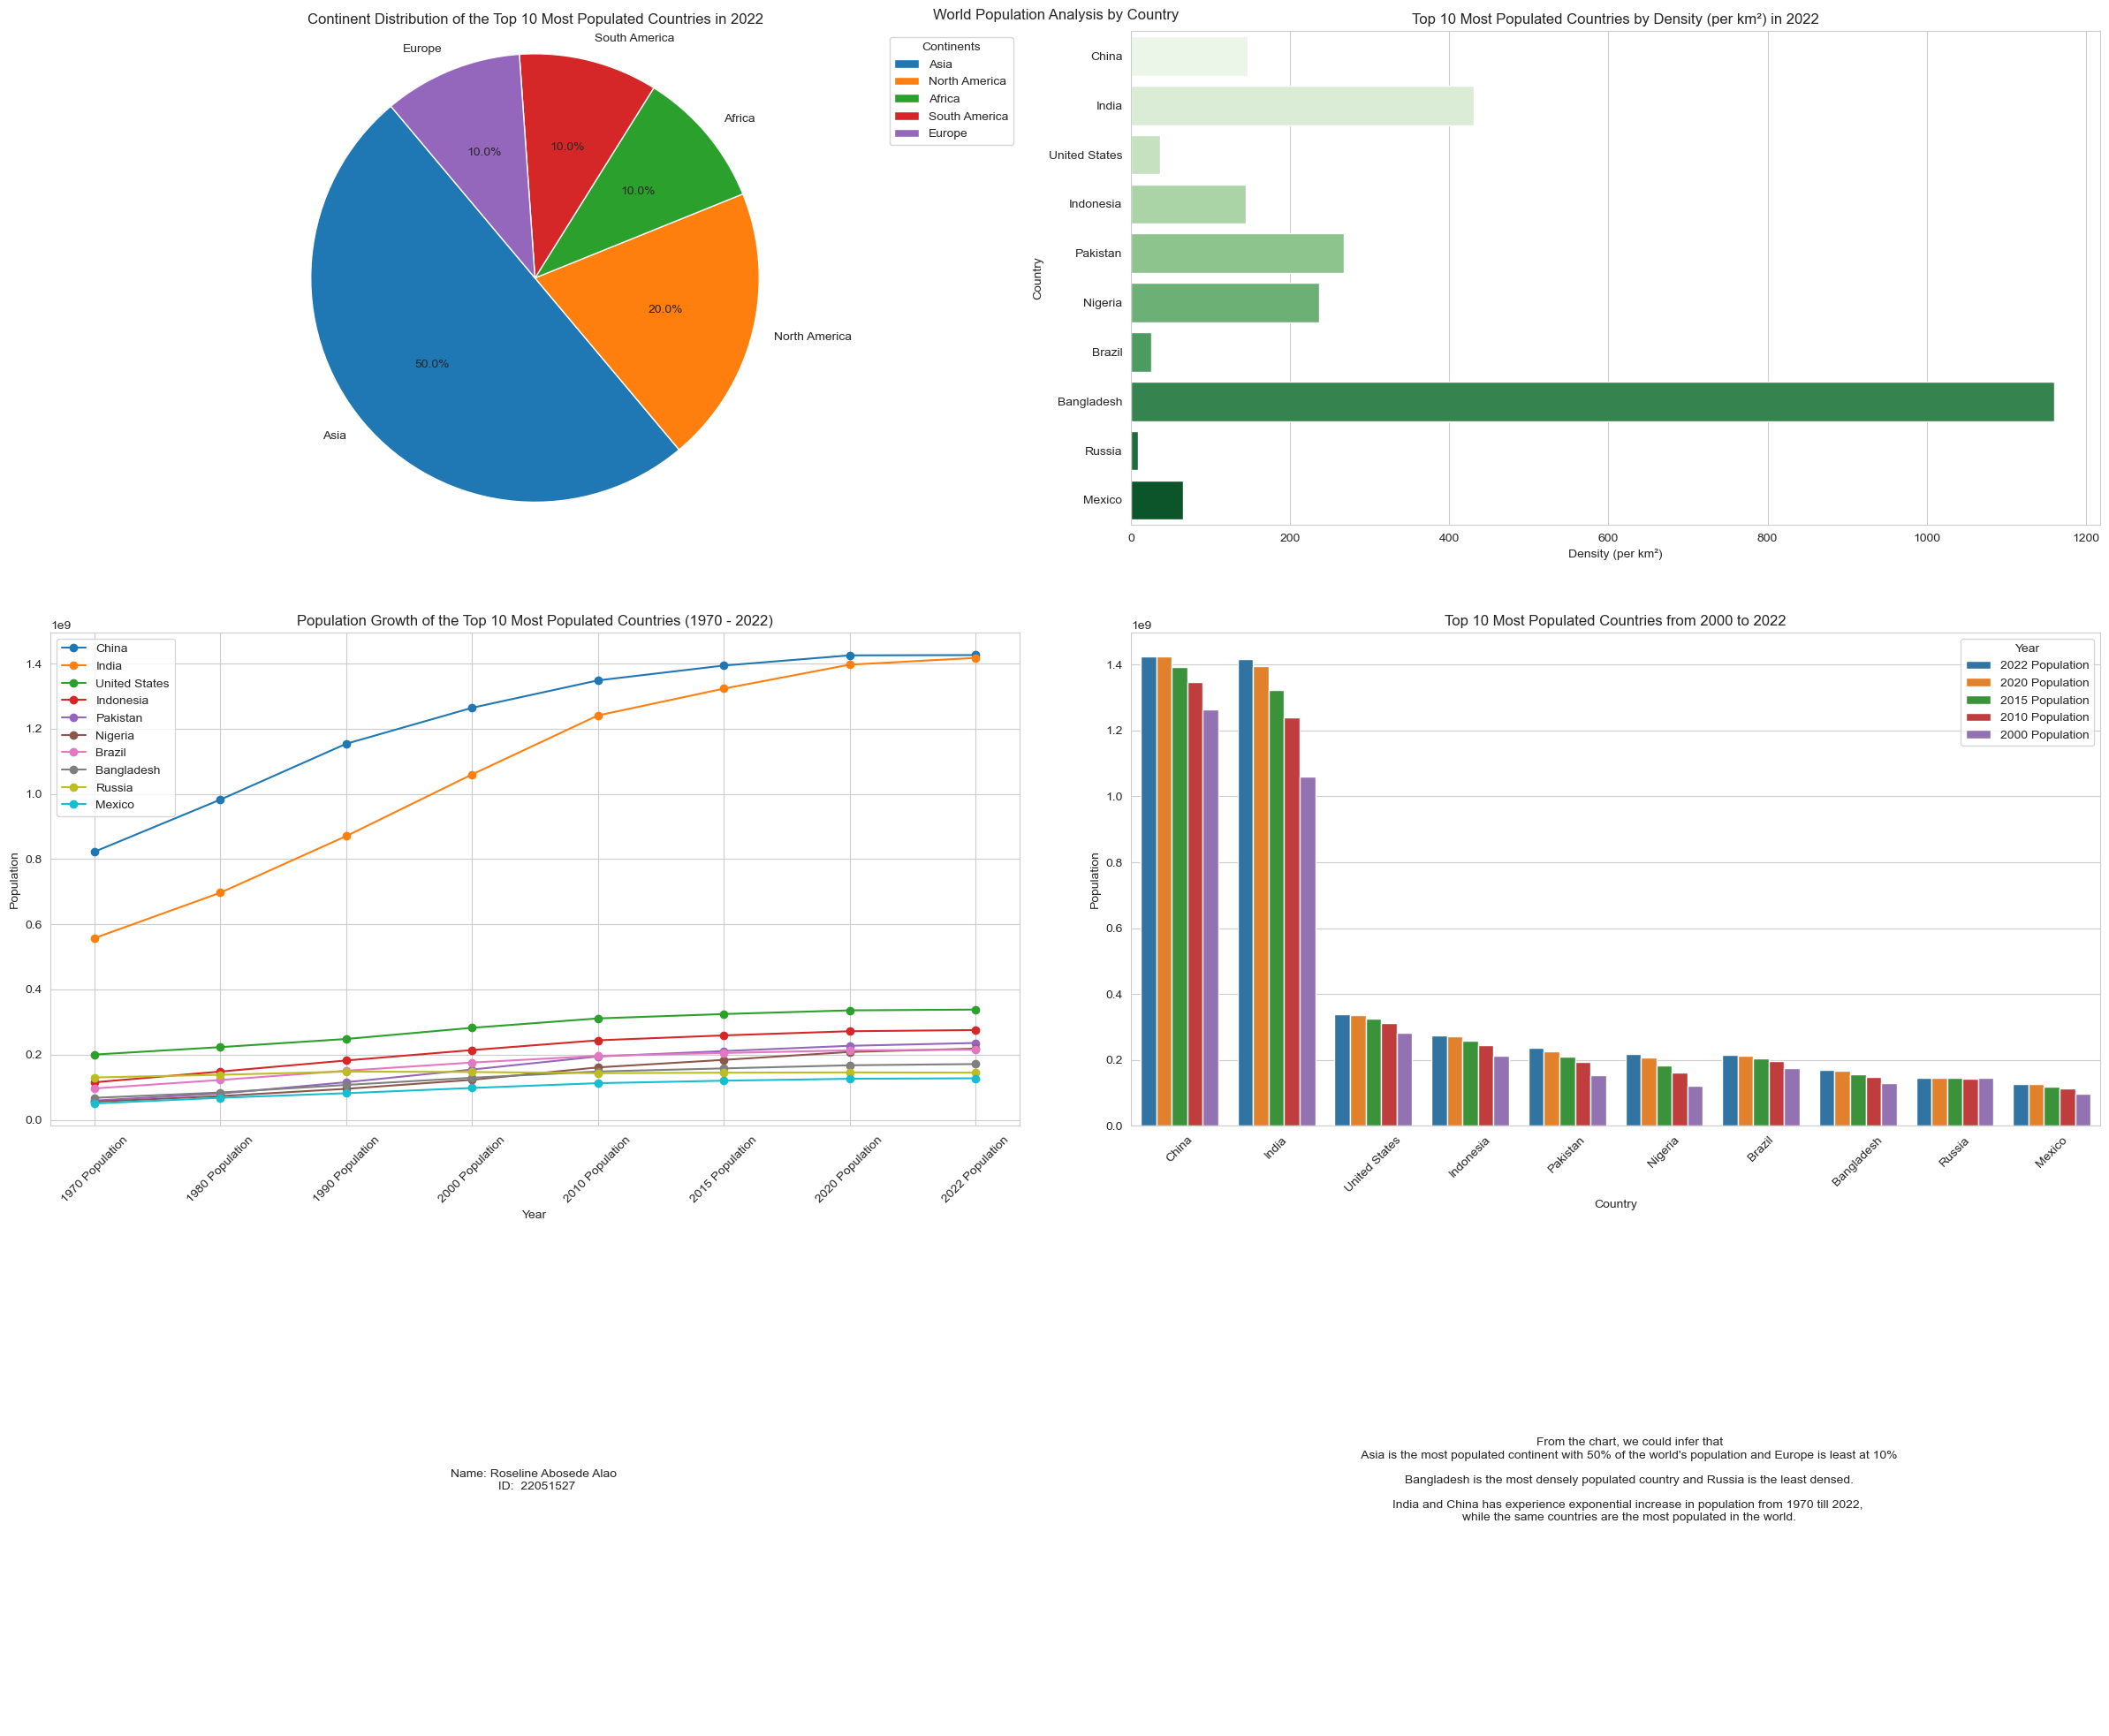

In [4]:
from matplotlib import pyplot as plt
import seaborn as sns


df = pd.read_csv('world_population.csv')

# Set the style for seaborn
sns.set_style('whitegrid')

# Create a figure and a set of subplots
fig, axs = plt.subplots(3, 2, figsize=(24, 20))

# Plot 1:
# Selecting the top 10 most populated countries in 2022
top_countries_population = df.nlargest(10, '2022 Population')
continent_counts = top_countries_population['Continent'].value_counts()
axs[0, 0].pie(continent_counts, labels=continent_counts.index, autopct='%1.1f%%', startangle=130)
axs[0, 0].legend(continent_counts.index, title='Continents', loc='upper right')
axs[0, 0].axis('equal')
axs[0, 0].set_title('Continent Distribution of the Top 10 Most Populated Countries in 2022')


# Plot 2: Population growth rate by continent
density_colors = sns.color_palette('Greens', n_colors=10)
# Creating a horizontal bar plot for Density using axis
sns.barplot(x='Density (per km\u00b2)', y='Country/Territory', data=top_countries_population, palette=density_colors, ax=axs[0, 1])
# Adding labels and title
axs[0, 1].set_title('Top 10 Most Populated Countries by Density (per km\u00b2) in 2022')
axs[0, 1].set_xlabel('Density (per km\u00b2)')
axs[0, 1].set_ylabel('Country')
    

# Plot 3: 
# Selecting the top 10 most populated countries in 2022
top_countries = df.nlargest(10, '2022 Population')
top_countries.set_index('Country/Territory', inplace=True)

# Selecting the population columns for the years of interest
population_columns = ['1970 Population', '1980 Population', '1990 Population', '2000 Population', '2010 Population', '2015 Population', '2020 Population', '2022 Population']

# Plotting the line chart using axis
for country in top_countries.index:
    axs[1, 0].plot(population_columns, top_countries.loc[country, population_columns], marker='o', label=country)

# Adding labels and title
axs[1, 0].set_title('Population Growth of the Top 10 Most Populated Countries (1970 - 2022)')
axs[1, 0].set_xlabel('Year')
axs[1, 0].set_ylabel('Population')
axs[1, 0].legend()
axs[1, 0].tick_params(axis='x', rotation=45)
    

# Plot 4
top_countries1 = df.nlargest(10, '2022 Population')

# Melting the dataframe to long format for easier plotting with seaborn
melted_data = top_countries1.melt(id_vars=['Country/Territory'], value_vars=['2022 Population', '2020 Population', '2015 Population', '2010 Population', '2000 Population'],
                                    var_name='Year', value_name='Population')

# Plotting the grouped bar chart using axis
sns.barplot(x='Country/Territory', y='Population', hue='Year', data=melted_data, ax=axs[1, 1])

# Adding labels and title
axs[1, 1].set_title('Top 10 Most Populated Countries from 2000 to 2022')
axs[1, 1].set_xlabel('Country')
axs[1, 1].set_ylabel('Population')
axs[1, 1].legend(title='Year')
axs[1, 1].tick_params(axis='x', rotation=45)


info = ("Name: Roseline Abosede Alao \n ID:  22051527")

description = (
        """
        From the chart, we could infer that
        Asia is the most populated continent with 50% of the world's population and Europe is least at 10%\n
        Bangladesh is the most densely populated country and Russia is the least densed.\n
        India and China has experience exponential increase in population from 1970 till 2022, 
        while the same countries are the most populated in the world.
        """
    )


# Student Information
axs[2, 1].tick_params(axis='both', which='both', length=0)
axs[2, 1].set_frame_on(False)
axs[2, 1].axis('off')
axs[2, 1].text(0.5, 0.5, description, ha='center', va='center')

# Chart Information
axs[2, 0].set_frame_on(False)
axs[2, 0].axis('off')
axs[2, 0].text(0.5, 0.5, info, ha='center', va='center')

# Title
fig.suptitle('World Population Analysis by Country')

# Adjust layout
plt.tight_layout()

fig.savefig('22051527.png', format='png', dpi=300)
